In [1]:
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.python.client import device_lib 
from tensorflow.keras.datasets import cifar10

tf.__version__

'2.5.0'

In [2]:
# Only for Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# See where tensorflow Cpu / Gpu is running
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14413938601143025661
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14509932544
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3423015320970176553
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [4]:
# define class names

class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Boat', 'Truck']

In [5]:
# Load and split Dataset 

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [6]:
# Normalize Dataset

X_train = X_train / 255.0

X_test = X_test / 255.0

In [7]:
# We have 50,000 images of 32x32 pixels with 3 colors

X_train.shape

(50000, 32, 32, 3)

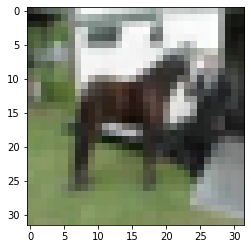

In [8]:
# example image

plt.imshow(X_test[20])

In [9]:
class_names[int(y_test[20])]

'Horse'

In [10]:
# We define the Convolutional neural network model
model = tf.keras.models.Sequential()

# Add the first convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

# Add the second convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

# Add max pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Add the third convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

# Add the quarter convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

# Add another max pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Add flattening layer
model.add(tf.keras.layers.Flatten())

# Add the output layer
# units: number of classes (10 in the case of cifar), activation function: 'softmax' (probabilities of each class)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Copile the model
# Use adam optimizer and loss with Sparse softmax (categorical) crossentropy 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [11]:
# We train the model

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 38s 4ms/step - loss: 1.3871 - sparse_categorical_accuracy: 0.5052
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9116 - sparse_categorical_accuracy: 0.6813
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7439 - sparse_categorical_accuracy: 0.7420
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6482 - sparse_categorical_accuracy: 0.7746
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5663 - sparse_categorical_accuracy: 0.8029


In [12]:
# Test the model

test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7621 - sparse_categorical_accuracy: 0.7439


In [13]:
# Save the model

model_json = model.to_json()
with open("cifar10.json", "w") as json_file:
    json_file.write(model_json)

In [18]:
# Save model weight

model.save_weights("cifar10.h5")

In [15]:
# We re-train the model 5 epoch more

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4990 - sparse_categorical_accuracy: 0.8244
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4393 - sparse_categorical_accuracy: 0.8461
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3901 - sparse_categorical_accuracy: 0.8630
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3429 - sparse_categorical_accuracy: 0.8791
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2976 - sparse_categorical_accuracy: 0.8939


In [16]:
# re-Test the model with the new training

test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9292 - sparse_categorical_accuracy: 0.7540


In [17]:
# the model work worst because now are overfitting